# Analyzing Customer Behavior for E-commerce Insights.

## Business Understanding 

E-commerce businesses generate massive amounts of event data from customer sessions, product views, and purchases. Leveraging this data is critical for improving sales, strengthening engagement, and delivering personalized shopping experiences.
Npontu Technologies collects large volumes of e-commerce event data,however the company currently lacks a structured way to translate this raw data into meaningful insights.The business wants to raise revenue, improve engagement, and tailor offers.


### Problem Statement

The company lacks clear signals to find at-risk customers, high-value buyers, and product opportunities. This gap limits the company’s ability to raise revenue, improve customer engagement, and deliver personalized experiences that keep customers coming back.


### Business Objectives 
- Increase repeat purchase rate by identifying and re-engaging at-risk customers.

- Grow average order value by targeting high-potential buyers with offers.

- Improve conversion rate by optimizing product funnels and merchandising.

- Personalize marketing to reduce churn and raise lifetime value (LTV).

- Demonstrate a scalable pipeline (streaming or batch) to compute features in near real-time.


### Goal
By leveraging on the CRISP-DM framework I will transform raw event logs into customer profiles, predictive models, and interactive dashboards. Npontu Technologies can gain actionable insights that drive revenue growth, enhance customer loyalty, and support data-driven decision-making.



### Stakeholders

- Product Manager — decides promotions, product placements, UX changes.

- Growth/Marketing Team — runs campaigns and needs segments and uplift targets.

- Customer Success Team — acts on churn predictions and win-back flows.

- Data Engineering Team — builds ingestion and feature pipelines (Kafka, Spark).

- Data Science Team — builds models and explains them.

- Business Leadership — reviews ROI, revenue impact, and prioritizes initiatives.



### Key Features

The dataset contains the following key files:

1. customers.csv

- Contains customer-level information. Fields include customer_id, age, gender, location and signup_date

2. sessions.csv

- Captures details about customer browsing sessions. This includes session_id, customer_id, session_date, product_viewed, browsing_time_sec,purchase_made and purchase_amount.This helps track how customers interact with the platform over time.




### Key Features of the E-Commerce Insights

- Churn risk list with confidence scores and top drivers per customer.

- Customer segments (new, loyal, at-risk, high LTV) and recommended actions.

- Product funnel metrics: view → add to cart → purchase conversion by product.

- Time trends and seasonality: weekly/monthly demand peaks and campaign lift.

- Top revenue cohorts and product pairs for cross-sell suggestions.

- Dashboard for monitoring model performance and business KPIs.




### Key features to engineer (data features to create)

- RFM: recency (days since last purchase), frequency (# purchases), monetary (total spend).

- Session features: avg session duration, pages viewed, product views per session.

- Recency buckets and days_since_last_purchase (for churn label).

- Behavioral rates: add-to-cart rate, purchase_rate = purchases / sessions.

- Product interaction features: top categories viewed, favorite category, cross-view counts.

- Temporal features: hour_of_day, day_of_week, month, days_since_signup, season flags.

- Derived financials: avg_order_value, CLTV proxy (sum of orders over period), discount usage.




### Hypothesis

Customers with long recency (no recent purchase) and low session frequency are more likely to churn.



### 7 Analytical Questions

1. Which customers are likely to churn in the next 90 days?

- Use recency, frequency, monetary, session patterns, and recent activity as features.

2. Which actions move at-risk customers back to buying?

- Test offers, email cadence, and personalized product recommendations (A/B test).

3. Which product categories have the largest view → purchase leakage?

- Identify pages with high views but low purchases to target UX or pricing fixes.

4. Who are the top 5% highest-value customers and what early signals identify them?

- Build a short-term predictor to flag future high-value buyers within first 30 days.

5. What is the average order value (AOV) by customer cohort and how can it be increased?

- Segment by acquisition channel, signup month, and product interest.

6. Which product combinations or sequences suggest strong cross-sell opportunities?

- Use association rules or co-view / co-purchase analysis.

7. How does conversion and purchase behavior change over time (seasonality & campaign effects)?

- Attribute lifts to marketing and note when retraining models is necessary.







### Data Understanding & Preparation
Importing all the relevant libraries

In [1]:
# Core Python Utilities & Configurations

import os
import warnings
import logging
 
warnings.filterwarnings("ignore")
 
# Data Handling and Manipulation
import pandas as pd
import numpy as np
import scipy

# Big Data Processing
from kafka import KafkaConsumer, KafkaProducer  # or just import kafka if using differently
from pyspark.sql import SparkSession

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Feature Engineering & Preprocessing

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
 

# Anomaly Detection & Clustering

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.cluster import DBSCAN
 

# Model Evaluation & Hyperparameter Tuning

from sklearn.metrics import accuracy_score, classification_report, ndcg_score
from sklearn.model_selection import GridSearchCV
 

# Performance & Progress Tracking

from tqdm import tqdm  
 

# Statistical and Scientific Computing
import statsmodels.api as sm

# Machine Learning & Recommendation Systems
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # example ML model
from sklearn.metrics import accuracy_score  # example metric

# Geographic Data & Mapping
import geopandas as gpd

# Dashboarding for Final Reporting
import dash
from dash import dcc, html

import dash_bootstrap_components as dbc


# Initialization & Status Confirmation

print("✅ Project initialized successfully! All necessary libraries are loaded.")













✅ Project initialized successfully! All necessary libraries are loaded.


### Load all datasets from their sources

In [2]:

# Path of customer csv file
file_path = '../Analyzing-Customer-Behavior-for-E-commerce-Insights/Data/customers.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_customers = pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_customers.head()


File exists at the specified path.


,customer_id,age,gender,location,signup_date
0,CUST00001,56,Female,Ghana,2020-11-29
1,CUST00002,69,Male,India,2022-11-09
2,CUST00003,46,Female,NaN,2020-07-23
3,CUST00004,32,Male,India,2022-08-13
4,CUST00005,60,Female,Brazil,2020-12-20


In [3]:
# Path of session csv file
file_path = '../Analyzing-Customer-Behavior-for-E-commerce-Insights/Data/sessions.csv'

# Check if the file exists at the specified path
if os.path.exists(file_path):
    print("File exists at the specified path.")
    try:
        # Read the Excel file into a pandas DataFrame
        df_sessions = pd.read_csv(file_path)
       
    except FileNotFoundError as e:
        print(f"FileNotFoundError: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print("File does not exist at the specified path.")
 
# Display the DataFrame
df_sessions.head()


File exists at the specified path.


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0.0
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0.0
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0.0
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0.0
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0.0


#### Concatenating the two data sets to form one. 
We will do a left join using the customer id which is common to both data sets. df_final is the combined data set of customers and sessions data

In [4]:
df_combine = df_sessions.merge(df_customers, how='left', on='customer_id', suffixes=('_df_sessions','_df_customers'))



## Exploratory Data Analysis(EDA)

In [5]:
df_combine.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0.0,31.0,Female,US,2020-04-25
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0.0,34.0,Female,Brazil,2021-01-26
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0.0,64.0,Male,India,2021-03-01
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0.0,52.0,Female,India,2022-01-28
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0.0,57.0,Female,US,2021-04-06


In [6]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50100 non-null  object 
 1   customer_id        49900 non-null  object 
 2   session_date       50100 non-null  object 
 3   product_viewed     49099 non-null  object 
 4   browsing_time_sec  50100 non-null  int64  
 5   purchase_made      50100 non-null  int64  
 6   purchase_amount    50100 non-null  float64
 7   age                49900 non-null  float64
 8   gender             48983 non-null  object 
 9   location           47542 non-null  object 
 10  signup_date        49900 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.2+ MB


In [7]:
#Summary Statistics
df_combine.describe()

,browsing_time_sec,purchase_made,purchase_amount,age
count,50100.000000,50100.000000,50100.000000,49900.000000
mean,300.831776,0.299521,300.315221,43.484549
std,298.183835,0.458053,557.318938,14.930561
min,0.000000,0.000000,0.000000,18.000000
25%,87.000000,0.000000,0.000000,31.000000
50%,210.000000,0.000000,0.000000,43.000000
75%,418.000000,1.000000,338.687500,56.000000
max,3316.000000,1.000000,1999.740000,69.000000


In [8]:
# Get the list of all column names in the DataFrame
columns = df_combine.columns
 
# Print details of unique values for each column in the DataFrame
for column in columns:
    print(f'{column}')  
    print(f'There are {df_combine[column].unique().size} unique values')  
    print(f'{df_combine[column].unique()}')  
    print('_' * 80)

session_id
There are 50000 unique values
['SESS000001' 'SESS000002' 'SESS000003' ... 'SESS049998' 'SESS049999'
 'SESS050000']
________________________________________________________________________________
customer_id
There are 5001 unique values
['CUST04899' 'CUST00246' 'CUST04945' ... 'CUST01540' 'CUST01160'
 'CUST03565']
________________________________________________________________________________
session_date
There are 1000 unique values
['2021-06-16' '2022-09-23' '2023-03-08' '2021-08-24' '2023-07-11'
 '2022-02-02' '2021-11-16' '2023-03-26' '2022-06-16' '2021-01-07'
 '2022-12-23' '2022-04-03' '2021-08-26' '2023-05-12' '2022-03-27'
 '2023-06-15' '2021-04-24' '2022-05-07' '2021-11-05' '2022-03-25'
 '2021-06-07' '2023-04-14' '2022-02-03' '2022-10-01' '2021-07-22'
 '2023-01-06' '2022-08-05' '2022-03-30' '2023-05-10' '2021-04-30'
 '2023-08-11' '2022-10-27' '2022-06-19' '2022-10-14' '2023-08-02'
 '2022-09-16' '2022-10-12' '2023-07-02' '2021-06-29' '2022-10-04'
 '2022-12-01' '2022-05

In [9]:
df_combine.duplicated().sum()

np.int64(100)

In [10]:
# Check for duplicated rows
duplicated_rows = df_combine.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_combine[duplicated_rows]

Number of duplicated rows: 100


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date
50000,SESS035532,CUST00907,2023-01-18,Bag,345,0,0.00,27.0,Male,NaN,2022-06-25
50001,SESS044034,CUST03802,2023-03-16,Headphones,432,1,1691.56,35.0,Female,US,2022-05-29
50002,SESS030165,CUST03005,2022-12-06,Shoes,2004,0,0.00,35.0,Female,UK,2023-04-22
50003,SESS001810,CUST00010,2022-12-05,Headphones,625,0,0.00,40.0,Male,Germany,2022-07-29
50004,SESS012983,CUST00685,2021-07-03,Shoes,311,1,341.58,59.0,Female,US,2022-06-16
...,...,...,...,...,...,...,...,...,...,...,...
50095,SESS033968,CUST00612,2023-07-21,Book,418,0,0.00,53.0,Male,UK,2022-06-29
50096,SESS039449,CUST01708,2021-12-21,Camera,438,1,333.22,47.0,Male,Ghana,2021-12-11
50097,SESS015640,CUST01452,2022-10-12,Bag,345,1,756.40,59.0,Male,UK,2022-09-10
50098,SESS039615,CUST04341,2022-04-17,Phone,273,0,0.00,41.0,Male,US,2021-11-24


In [11]:
# Check for duplicated columns

# Transpose the DataFrame and check for duplicated columns
duplicated_columns = df_combine.T.duplicated()

# Get the list of duplicated column names
duplicate_col_names = df_combine.columns[duplicated_columns]

# Display the number and names of duplicated columns
print(f"Number of duplicated columns: {duplicated_columns.sum()}")
print(f"Duplicated columns: {list(duplicate_col_names)}")



Number of duplicated columns: 0
Duplicated columns: []


In [12]:
# Check the datatype and the number of columns for customers data set 

df_combine.info(verbose=False, memory_usage='deep')
 
missing_counts = df_combine.isna().sum()
non_null_counts = df_combine.notna().sum()
dtype_info = df_combine.dtypes
 
df_combineinfo = pd.DataFrame({
    "Non-Null Count": non_null_counts,
    "Missing Count": missing_counts,
    "Missing Percentage": round((missing_counts / len(df_combine)) * 100, 2),
    "Dtype": dtype_info
})
 
# Display results
df_combineinfo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50100 entries, 0 to 50099
Columns: 11 entries, session_id to signup_date
dtypes: float64(2), int64(2), object(7)
memory usage: 20.4 MB


,Non-Null Count,Missing Count,Missing Percentage,Dtype
session_id,50100,0,0.00,object
customer_id,49900,200,0.40,object
session_date,50100,0,0.00,object
product_viewed,49099,1001,2.00,object
browsing_time_sec,50100,0,0.00,int64
purchase_made,50100,0,0.00,int64
purchase_amount,50100,0,0.00,float64
age,49900,200,0.40,float64
gender,48983,1117,2.23,object
location,47542,2558,5.11,object


Observations

The customers and sessions data set were combined using a left join to get df_combine. The df_combine has a total of 11 columms which includes the sessions_id, customer_id, session_date, product_viewed, browsing_time_sec, purchase_made, purchase_ammount, age, gender, location and signup_date. The df_combine data set has 500100 rows. 
However I observed that some the there are 100 duplicated rows in the data set. It has no duplicated columns. Some of the colunmns has missing values. The missing values per column are: The customer_ id has 200(0.40%), product_viewed has 1001(2%), age has 200(0.40%), gender has 1117(2.23%), location has 2558(5.11%) and signup_date has 200 (0.40%) missing values.

##### Data Cleaning
Fixing the duplicates and missing values

In [13]:
# Remove duplicated rows
df_combine = df_combine.drop_duplicates()

# Check if duplicates have been removed
print(f"Number of duplicated rows after removal: {df_combine.duplicated().sum()}")

Number of duplicated rows after removal: 0


In [14]:
# Check for duplicated rows
duplicated_rows = df_combine.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicated_rows.sum()}")

# Display duplicated rows
df_combine[duplicated_rows]

Number of duplicated rows: 0


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_amount,age,gender,location,signup_date


In [15]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50000 non-null  object 
 1   customer_id        49800 non-null  object 
 2   session_date       50000 non-null  object 
 3   product_viewed     49001 non-null  object 
 4   browsing_time_sec  50000 non-null  int64  
 5   purchase_made      50000 non-null  int64  
 6   purchase_amount    50000 non-null  float64
 7   age                49800 non-null  float64
 8   gender             48886 non-null  object 
 9   location           47450 non-null  object 
 10  signup_date        49800 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.6+ MB


Handling missing values

In [16]:
#  quick missing summary function (optional)
def missing_summary(df_combine):
    n = len(df_combine)
    s = []
    for c in df_combine.columns:
        missing = df_combine[c].isna().sum()
        pct = 100 * missing / n
        s.append((c, missing, round(pct,2), df_combine[c].dtype))
    return pd.DataFrame(s, columns=["column","missing_count","missing_pct","dtype"]).sort_values("missing_pct", ascending=False)

print(missing_summary(df_combine))

               column  missing_count  missing_pct    dtype
9            location           2550         5.10   object
8              gender           1114         2.23   object
3      product_viewed            999         2.00   object
10        signup_date            200         0.40   object
7                 age            200         0.40  float64
1         customer_id            200         0.40   object
0          session_id              0         0.00   object
2        session_date              0         0.00   object
6     purchase_amount              0         0.00  float64
4   browsing_time_sec              0         0.00    int64
5       purchase_made              0         0.00    int64


In [17]:
# 1) Parse dates

df_combine['session_date'] = pd.to_datetime(df_combine['session_date'], errors='coerce')
df_combine['signup_date']  = pd.to_datetime(df_combine['signup_date'],  errors='coerce')

In [18]:
# 2) customer_id: mark guest sessions (do not drop yet)

df_combine['customer_id'] = df_combine['customer_id'].astype(object)  # ensure object
df_combine['customer_id'] = df_combine['customer_id'].where(df_combine['customer_id'].notna(), 'GUEST_UNKNOWN')

In [19]:
# 3) product_viewed: replace missing with explicit token

df_combine['product_viewed'] = df_combine['product_viewed'].astype(object)
df_combine['product_viewed'] = df_combine['product_viewed'].replace({np.nan: 'Unknown_Product', '': 'Unknown_Product'})

In [20]:
# 4) browsing_time_sec: numeric, fix negatives, fill median

df_combine['browsing_time_sec'] = pd.to_numeric(df_combine['browsing_time_sec'], errors='coerce')

# treat unrealistic zeros if you want (optional). Here we keep zero but fix negatives:

df_combine.loc[df_combine['browsing_time_sec'] < 0, 'browsing_time_sec'] = np.nan
median_bt = int(df_combine['browsing_time_sec'].median(skipna=True))
df_combine['browsing_time_sec'] = df_combine['browsing_time_sec'].fillna(median_bt).astype(int)

In [21]:
# 5) Convert to numeric, turn non-numeric into NaN, then fill with 0.0
df_combine['purchase_amount'] = pd.to_numeric(df_combine['purchase_amount'], errors='coerce').fillna(0.0)

# If any purchase amount is negative, replace it with 0.0
df_combine.loc[df_combine['purchase_amount'] < 0, 'purchase_amount'] = 0.0


In [22]:
# 5) age: numeric, clip unrealistic values, fill median

df_combine['age'] = pd.to_numeric(df_combine['age'], errors='coerce')
df_combine.loc[(df_combine['age'] < 13) | (df_combine['age'] > 100), 'age'] = np.nan
age_median = int(df_combine['age'].median(skipna=True))
df_combine['age'] = df_combine['age'].fillna(age_median).astype(int)

In [23]:
# 6) gender & location: fill with 'Unknown' or keep a missing flag

df_combine['gender'] = df_combine['gender'].fillna('Unknown').astype(str)
df_combine['location'] = df_combine['location'].fillna('Unknown').astype(str)

In [24]:
# Makes sense if you assume they signed up on the day of their first activity.
df_combine['signup_date'] = df_combine['signup_date'].fillna(df_combine['session_date'])


In [25]:
# drop exact duplicates (keep first)
before = len(df_combine)
df = df_combine.drop_duplicates()
after = len(df_combine)
print(f"Dropped {before-after} exact duplicate rows.")


Dropped 0 exact duplicate rows.


In [26]:
# 10) final checks
print("\nFinal dtypes:")
print(df_combine.dtypes)
print("\nMissing summary after cleaning:")
print(missing_summary(df_combine))


Final dtypes:
session_id                   object
customer_id                  object
session_date         datetime64[ns]
product_viewed               object
browsing_time_sec             int64
purchase_made                 int64
purchase_amount             float64
age                           int64
gender                       object
location                     object
signup_date          datetime64[ns]
dtype: object

Missing summary after cleaning:
               column  missing_count  missing_pct           dtype
0          session_id              0          0.0          object
1         customer_id              0          0.0          object
2        session_date              0          0.0  datetime64[ns]
3      product_viewed              0          0.0          object
4   browsing_time_sec              0          0.0           int64
5       purchase_made              0          0.0           int64
6     purchase_amount              0          0.0         float64
7             

Feature Engineering

In [27]:
# Keep original column
# Create a new binary column

# Create purchase_flag
df_combine['purchase_flag'] = pd.to_numeric(df_combine['purchase_made'], errors='coerce').fillna(0).astype(int)
df_combine['purchase_flag'] = df_combine['purchase_flag'].apply(lambda x: 1 if x > 0 else 0)

# Reorder: move purchase_flag after purchase_made
cols = list(df_combine.columns)
purchase_made_idx = cols.index('purchase_made')
# insert purchase_flag right after purchase_made
cols.insert(purchase_made_idx + 1, cols.pop(cols.index('purchase_flag')))
df_combine= df_combine[cols]

# Check
df_combine.head()


,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06


#### Time based features

In [28]:
# Day of week: people may shop more on weekends.
df_combine['day_of_week'] = df_combine['session_date'].dt.day_name()


In [29]:
# Month: captures seasonality in purchases (with names instead of numbers)
df_combine['month'] = df_combine['session_date'].dt.month_name()




In [30]:
# Tenure days: how long since signup.
df_combine['tenure_days'] = (df_combine['session_date'] - df_combine['signup_date']).dt.days.fillna(0)


In [31]:
df_combine.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date,day_of_week,month,tenure_days
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25,Wednesday,June,417
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26,Friday,September,605
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01,Wednesday,March,737
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28,Tuesday,August,-157
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06,Tuesday,July,826


##### Customer demographics

In [32]:
# Age groups

bins = [0, 25, 40, 60, 100]
labels = ['<25', '25-40', '40-60', '60+']
df_combine['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)


##### Purchase patterns

Average session browsing time per customer

Total purchase amount per customer

Conversion rate (purchase_flag)

In [33]:
customer_features = df_combine.groupby('customer_id').agg({
    'browsing_time_sec': 'mean',
    'purchase_amount': 'sum',
    'purchase_flag': 'mean'
}).reset_index()


##### Normalization/standardization

Numeric features like browsing_time_sec, purchase_amount, tenure_days should be scaled.

In [34]:
scaler = StandardScaler()
df[['browsing_time_sec_scaled', 'purchase_amount_scaled', 'tenure_days_scaled']] = scaler.fit_transform(
    df_combine[['browsing_time_sec','purchase_amount','tenure_days']]
)


In [35]:
# save cleaned dataset
df_combine.to_csv("df_final.csv", index=False)

df_final = pd.read_csv("df_final.csv")
df_final.head()

,session_id,customer_id,session_date,product_viewed,browsing_time_sec,purchase_made,purchase_flag,purchase_amount,age,gender,location,signup_date,day_of_week,month,tenure_days,age_group
0,SESS000001,CUST04899,2021-06-16,Laptop,743,0,0,0.0,31,Female,US,2020-04-25,Wednesday,June,417,25-40
1,SESS000002,CUST00246,2022-09-23,Laptop,247,0,0,0.0,34,Female,Brazil,2021-01-26,Friday,September,605,25-40
2,SESS000003,CUST04945,2023-03-08,Laptop,201,0,0,0.0,64,Male,India,2021-03-01,Wednesday,March,737,60+
3,SESS000004,CUST03372,2021-08-24,Phone,93,0,0,0.0,52,Female,India,2022-01-28,Tuesday,August,-157,40-60
4,SESS000005,CUST01351,2023-07-11,Book,330,0,0,0.0,57,Female,US,2021-04-06,Tuesday,July,826,40-60


#### EDA of df_final

In [36]:
df_final.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   session_id         50000 non-null  object 
 1   customer_id        50000 non-null  object 
 2   session_date       50000 non-null  object 
 3   product_viewed     50000 non-null  object 
 4   browsing_time_sec  50000 non-null  int64  
 5   purchase_made      50000 non-null  int64  
 6   purchase_flag      50000 non-null  int64  
 7   purchase_amount    50000 non-null  float64
 8   age                50000 non-null  int64  
 9   gender             50000 non-null  object 
 10  location           50000 non-null  object 
 11  signup_date        50000 non-null  object 
 12  day_of_week        50000 non-null  object 
 13  month              50000 non-null  object 
 14  tenure_days        50000 non-null  int64  
 15  age_group          50000 non-null  object 
dtypes: float64(1), int64(5

#### Univariate Analysis
Quick checks for distributions, outliers, missingness.

                     count        mean         std     min    25%    50%  \
browsing_time_sec  50000.0  300.722260  298.154502     0.0   87.0  210.0   
purchase_amount    50000.0  300.522847  557.475748     0.0    0.0    0.0   
age                50000.0   43.484820   14.901049    18.0   31.0   43.0   
tenure_days        50000.0  112.817280  519.828179 -1122.0 -270.0  107.0   

                       75%      max  
browsing_time_sec  418.000  3316.00  
purchase_amount    340.305  1999.74  
age                 56.000    69.00  
tenure_days        499.000  1363.00  


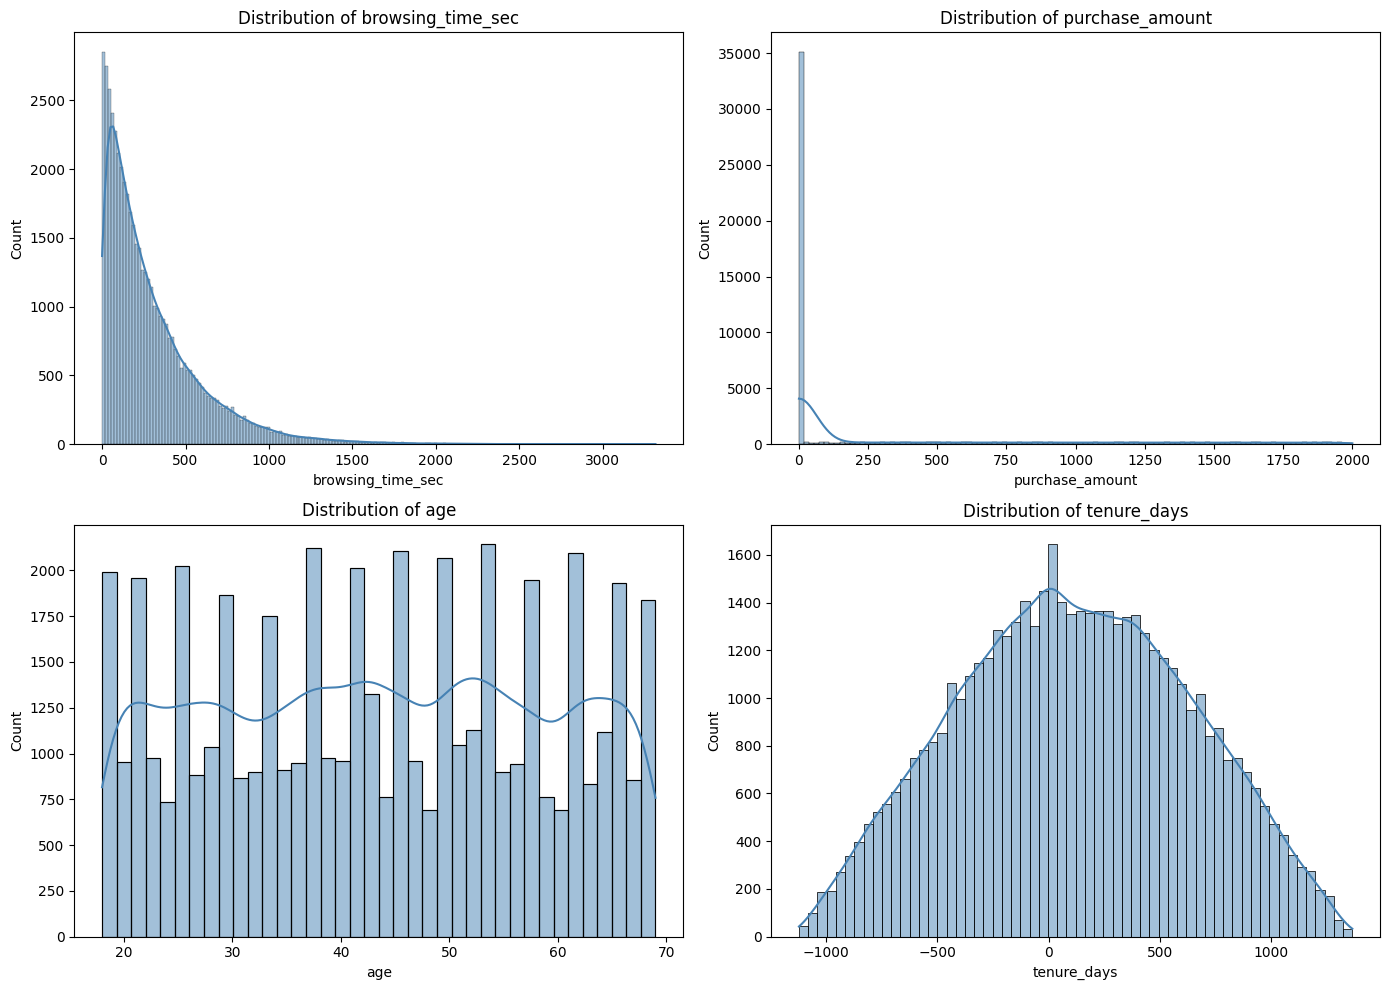


Top categories for product_viewed:
product_viewed
Shoes              10012
Phone               9869
Laptop              7461
Book                7330
Bag                 5105
Headphones          5000
Camera              3924
Unknown_Product      999
Name: count, dtype: int64


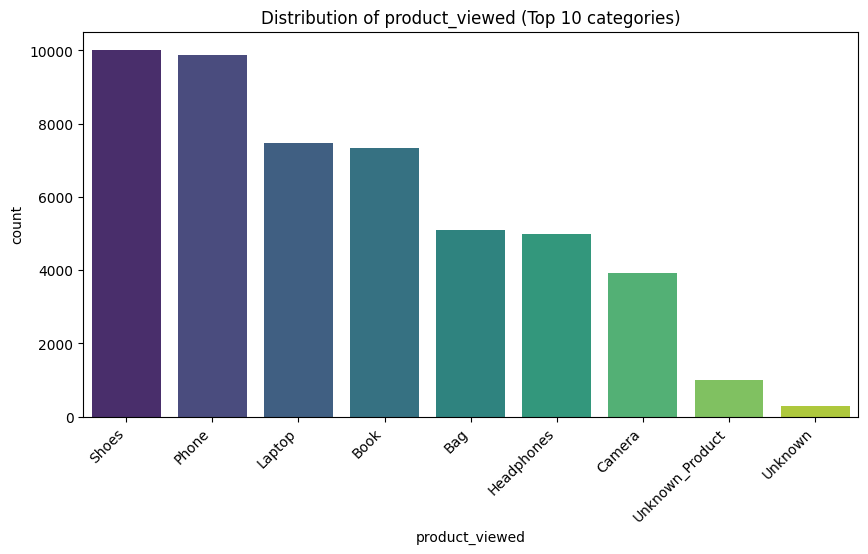


Top categories for gender:
gender
Male       24377
Female     23512
Unknown     1114
Other        997
Name: count, dtype: int64


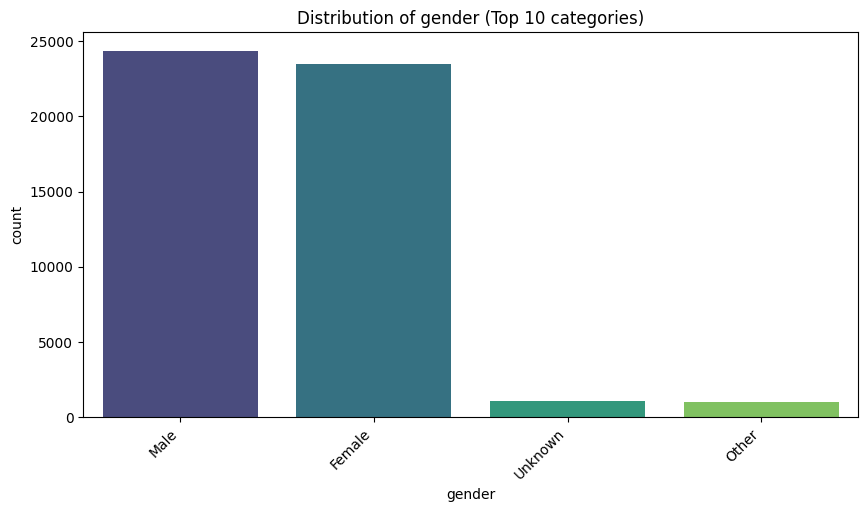


Top categories for location:
location
US         12302
India      10079
UK          7580
Germany     7224
Ghana       5142
Brazil      5123
Unknown     2550
Name: count, dtype: int64


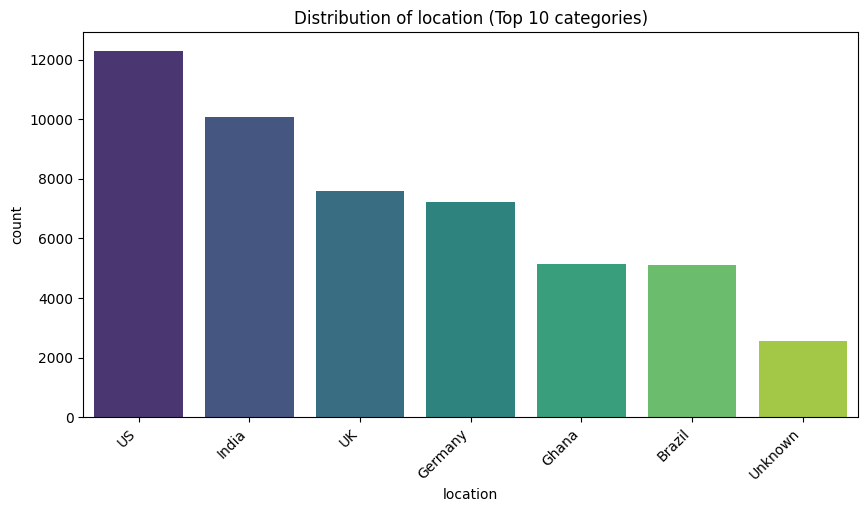


Top categories for day_of_week:
day_of_week
Saturday     7263
Tuesday      7158
Friday       7126
Sunday       7124
Monday       7120
Wednesday    7118
Thursday     7091
Name: count, dtype: int64


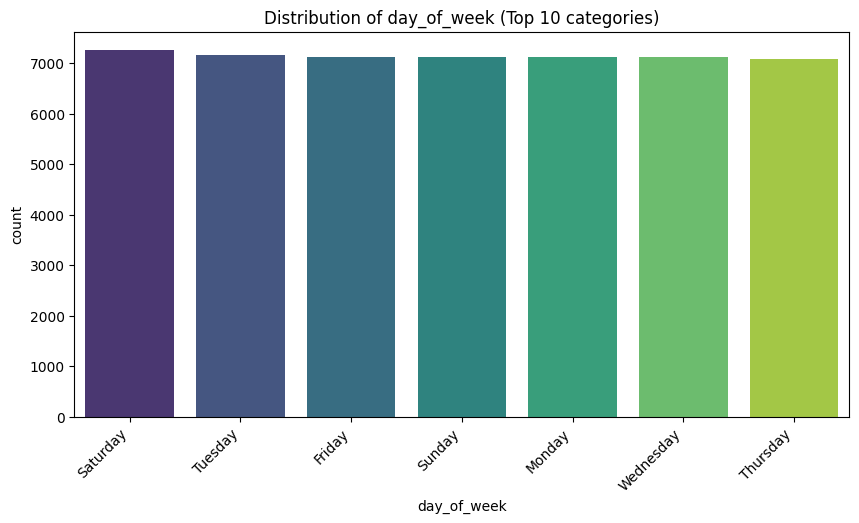


Top categories for month:
month
May          4706
August       4665
January      4653
March        4620
July         4611
June         4536
April        4422
September    4416
Name: count, dtype: int64


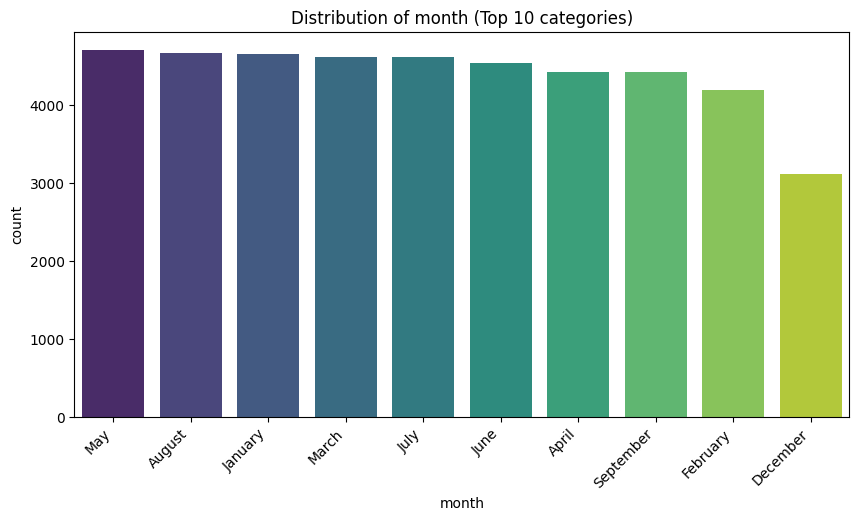


Top categories for age_group:
age_group
40-60    19487
25-40    14137
60+       8668
<25       7708
Name: count, dtype: int64


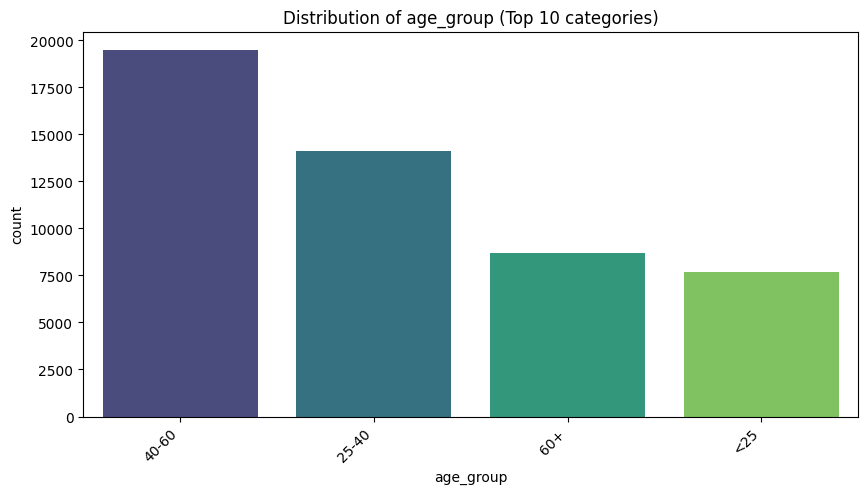

In [39]:
# 1) Numeric Summary + Histogram

num_cols = ['browsing_time_sec','purchase_amount','age','tenure_days']
print(df_final[num_cols].describe().T)

fig, axes = plt.subplots(2,2, figsize=(14,10))
axes = axes.flatten()
for i, c in enumerate(num_cols):
    sns.histplot(df_final[c], ax=axes[i], kde=True, color='steelblue')
    axes[i].set_title(f'Distribution of {c}')
plt.tight_layout()
plt.show()


# 2) Categorical Value Counts + Bar Plots

cat_cols = ['product_viewed','gender','location','day_of_week','month','age_group']

for c in cat_cols:
    print(f"\nTop categories for {c}:")
    print(df_final[c].value_counts(dropna=False).head(8))
    
    plt.figure(figsize=(10,5))
    sns.countplot(data=df_final, x=c, order=df_final[c].value_counts().index[:10], palette="viridis")
    plt.title(f"Distribution of {c} (Top 10 categories)")
    plt.xticks(rotation=45, ha='right')
    plt.show()


### Bi-variate Analysis
Analyze relationship between variables and the target (I will use purchase_flag as session-level target). Also do customer-level aggregates for churn analysis below.

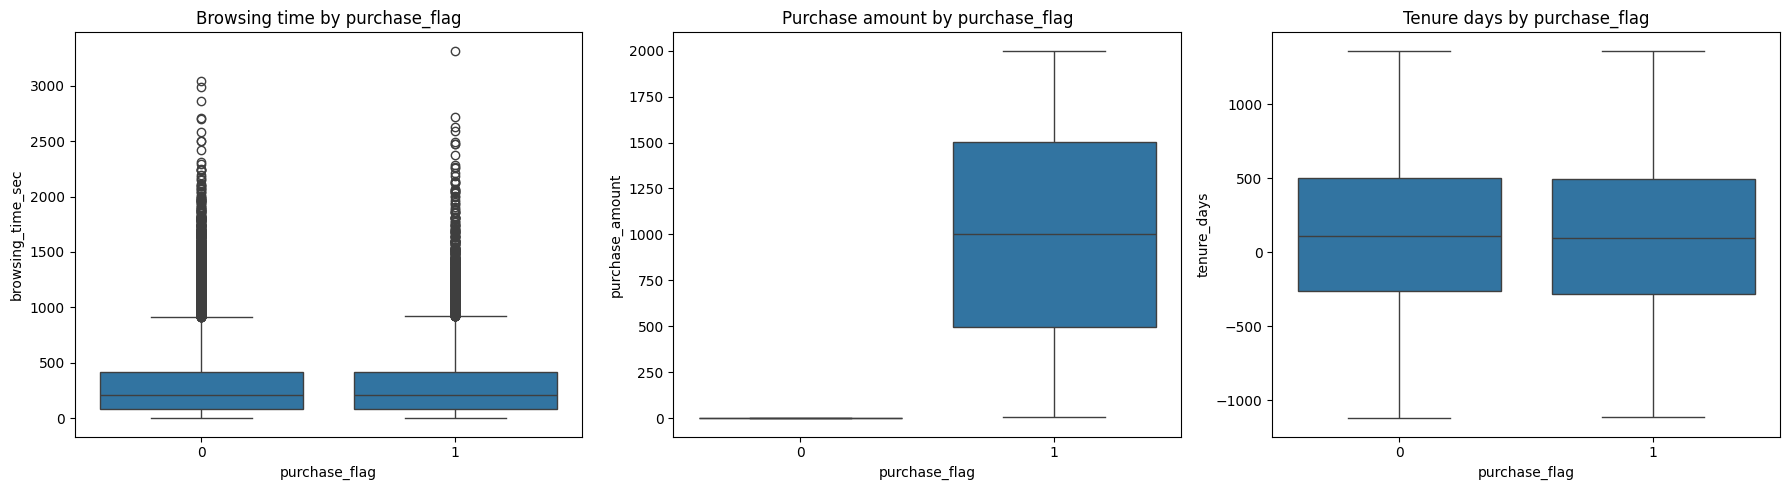

In [ ]:
# Session-level: numeric vs purchase_flag

# boxplots of numeric features by purchase_flag
fig, axes = plt.subplots(1,3, figsize=(18,5))
sns.boxplot(x='purchase_flag', y='browsing_time_sec', data=df_final, ax=axes[0])
sns.boxplot(x='purchase_flag', y='purchase_amount', data=df_final, ax=axes[1])
sns.boxplot(x='purchase_flag', y='tenure_days', data=df_final, ax=axes[2])
axes[0].set_title('Browsing time by purchase_flag')
axes[1].set_title('Purchase amount by purchase_flag')
axes[2].set_title('Tenure days by purchase_flag')
plt.tight_layout()
plt.show()


In [ ]:
# Categorical vs purchase_flag

# conversion rate by product and by day_of_week
prod_conversion = df_final.groupby('product_viewed').agg(views=('session_id','count'), purchases=('purchase_flag','sum'))
prod_conversion['conv_rate'] = prod_conversion['purchases'] / prod_conversion['views']
print(prod_conversion.sort_values('views', ascending=False).head(10))

# conversion by day of week
dow = df_final.groupby('day_of_week').agg(views=('session_id','count'), purchases=('purchase_flag','sum'))
dow['conv_rate'] = dow['purchases'] / dow['views']
print(dow.sort_values('conv_rate', ascending=False))


                 views  purchases  conv_rate
product_viewed                              
Shoes            10012       2957   0.295346
Phone             9869       3009   0.304894
Laptop            7461       2251   0.301702
Book              7330       2187   0.298363
Bag               5105       1538   0.301273
Headphones        5000       1505   0.301000
Camera            3924       1144   0.291539
Unknown_Product    999        302   0.302302
Unknown            300         92   0.306667
             views  purchases  conv_rate
day_of_week                             
Saturday      7263       2220   0.305659
Sunday        7124       2146   0.301235
Monday        7120       2141   0.300702
Thursday      7091       2132   0.300663
Wednesday     7118       2133   0.299663
Friday        7126       2109   0.295958
Tuesday       7158       2104   0.293937
